# Linear Regression Tutorial
In this notebook, I'll be discussing about Linear Regression and try to implement it in python in a very easy way so that a beginner will also be able to start learning intuition in Machine Learning.

## Numpy and Matplotlib
**Numpy:** This library is used to implement mathematical expressions.
**Matplotlib:** Will be used to generate graphs.

In [195]:
import numpy as np
import matplotlib.pyplot as plt

Linear Regression is just **Glorified straight curve fitting.**
What we want to do is to find a straight line that will fit the points with the least magnitude of error.
I'll be inplementing the algorithm in a one-dimensional dataset so that we can visualize it with the help of a graph.

In [196]:
X_train = [1.1, 2.2, 2.8,3.8,5.2,6,7.1,8.05,8.95,10.3]
y_train = [1,2,3,4,5,6,7,8,9,10]

Text(0,0.5,'y_train')

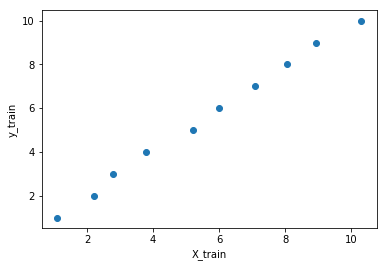

In [212]:
plt.scatter(X_train, y_train)
plt.xlabel('X_train')
plt.ylabel('y_train')

## 1. Initailizing Parameters
We first assume the equation of the straight line to be **y = wX + b** and initialize the parameters **w** and **b** with zero.                                           

In [199]:
w = 0
b = 0
m = len(X_train)
X_train = np.array(X_train)
y_train = np.array(y_train)
costs = []
ws = []
y_train

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## 2. Forward Propagation
Then the auxiliary **y** is generated.

In [200]:
y = np.dot(w,X_train.T) + b
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 3. Cost Function
The cost function is perhaps the most important part of the algorithm. This is the function that we constantly try to decrease

In [201]:
cost = (1/(2*m))*np.sum((y - y_train)**2)
cost

19.25

## 4. Backward Propagation
With the help of the cost function **(and some calculus)**, the parameters gets updated. 
The most tricky part here is the selection of hyperparameter alpha **(the value 0.001 in front of the equation)**.
This notebook was my third attempt as I could not find the most optimal value for alpha in the first two. 

In [202]:
w -= 0.001*(1/m)*np.dot((y-y_train),X_train)
w

0.038875

In [203]:
b -= 0.001*(1/m)*np.sum((y-y_train))
b

0.0055000000000000005

## 5. Optimization
We will have to continue this **forward - cost - backward** process for a large number of time to get the least value of cost and most optimal parameters.

In [204]:
for i in range(100):
    y = np.dot(w,X_train.T) + b
    cost = (1/(2*m))*np.sum((y - y_train)**2)
    w -= 0.001*(1/m)*np.dot((y-y_train),X_train)
    b -= 0.001*(1/m)*np.sum((y-y_train))
    ws.append(w)
    costs.append(cost)
    if i%10 == 0:
        print(cost)

17.739365527167973
7.837211994050121
3.466444956124552
1.537206028525401
0.6856461883305756
0.3097688629712999
0.14385558410410396
0.07061946397439305
0.03829061947141663
0.02401806655218834


In [205]:
for i in range(50):
    y = np.dot(w,X_train.T) + b
    cost = (1/(2*m))*np.sum((y - y_train)**2)
    w -= 0.001*(1/m)*np.dot((y-y_train),X_train)
    b -= 0.001*(1/m)*np.sum((y-y_train))
    ws.append(w)
    costs.append(cost)
    if i%10 == 0:
        print(cost)

0.01771548781020084
0.014930829922165437
0.013698977348990374
0.013152537244691282
0.012908646420159634


## 6. Results
Now is the time to review the parameters the we got in the end.

In [206]:
w,b

(0.9686487265314645, 0.134214389504315)

We can find out the descent of the cost functon **(Gradient Descent)** by plotting the diffrent values of costs at diffrent stages of optimization with diffrent values of parameters an diffrent stages of learning.

Text(0,0.5,'Costs')

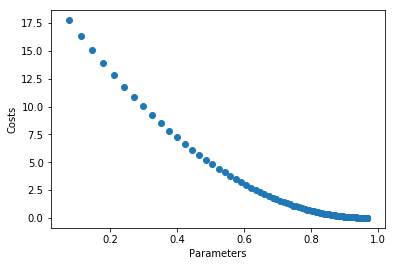

In [213]:
plt.scatter(ws,costs)
plt.xlabel('Parameters')
plt.ylabel('Costs')

With this final graph we will find out how well our algorithm did and is ok to use the algorithm to make **predictions**.

Text(0,0.5,'y')

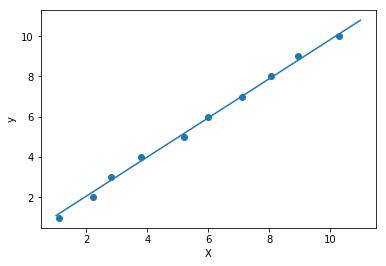

In [215]:
plt.scatter(X_train, y_train)
x = np.array([1,2,3,4,5,6,7,8,9,10,11])
y = w*x + b
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('y')